
## Introduction

> ***Note:*** _This can be a pair programming activity or done independently._

The most common application for AR, ARMA, and ARIMA models is inventory planning. Planning inventory for a small shop can be difficult enough, but you've just been hired to plan inventory for a _big_ store - Walmart

In this lab, you will be analyzing weekly Walmart sales data over a two year period from 2010 to 2012. The data is separated by store and by department, but you should focus on analyzing one store for simplicity. Your supervisor has set out the following goals for this project:

1. Record any observed trends in the data.
1. Produce a trained model to predict future sales numbers.
1. Include useful AND COMMENT ON how graphs (ACF, PACF) impact your modelling decisions throughout your notebook.

Try your best to tune your model. It can be difficult, but don't worry - timeseries analysis is just a difficult and specialized topic.

## Exercise
---

#### Requirements

- Assemble observations and graphs as well as timeseries models in a notebook.


#### Additional Resources

1. [ARMA Example](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/tsa_arma.html)
2. [ARMA Models for TSA](https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-1)

First, we need to setup our prerequisite DataFrame that will be used through the rest of the lab.

In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm


#%matplotlib inline

data = pd.read_csv('train_arima.csv')
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [2]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3+ MB


#### 1. Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [4]:
df = data[data['Store'] ==1]
df.head(3)

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False


In [5]:
df.shape

(10244, 4)

In [47]:
df.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [6]:
len(set(df.index))

143

In [7]:
df = df.groupby(df.index).sum()[['Weekly_Sales']]

In [8]:
df

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
2010-03-12,1439541.59
2010-03-19,1472515.79
2010-03-26,1404429.92
2010-04-02,1594968.28


In [9]:
df.index.dtype

dtype('O')

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df.index.dtype

dtype('<M8[ns]')

#### 2. Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

In [12]:
rolling_mean_4 = df.rolling(4).mean()
rolling_mean_12 = df.rolling(12).mean()
rolling_mean_52 = df.rolling(52).mean()

In [13]:
import matplotlib.pyplot as plt
#%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Plot of Rolling Means')

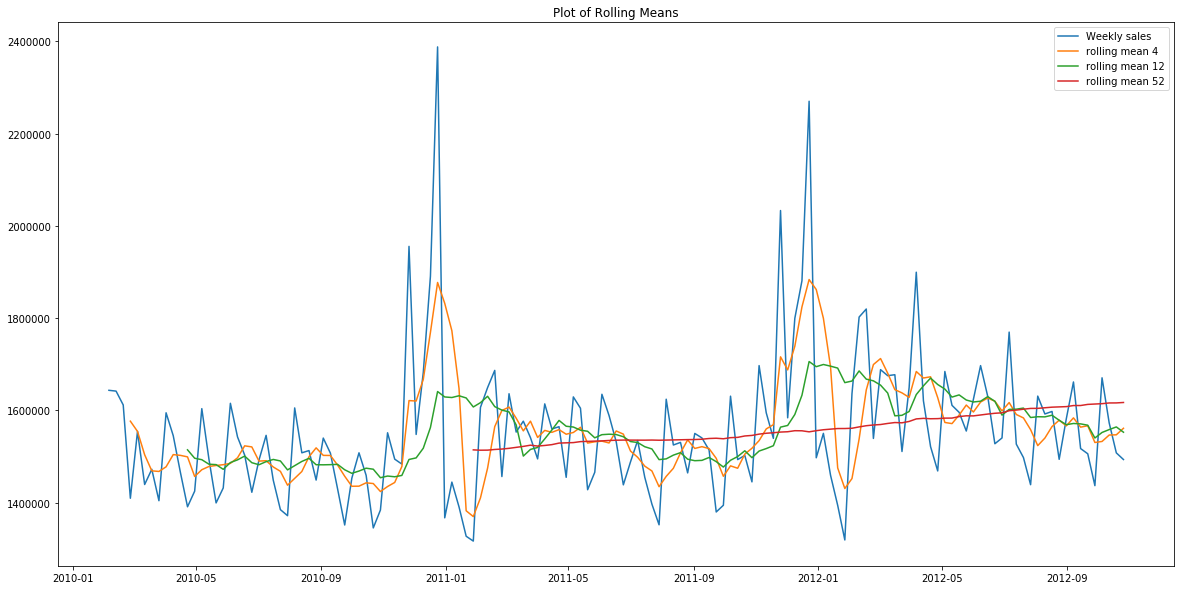

In [14]:
plt.figure(figsize = (20,10))

plt.plot(df.Weekly_Sales, label = 'Weekly sales')
plt.plot(rolling_mean_4, label = 'rolling mean 4')
plt.plot(rolling_mean_12, label = 'rolling mean 12')
plt.plot(rolling_mean_52, label = 'rolling mean 52')


plt.legend()
plt.title('Plot of Rolling Means')

#### 3. Compute the 1, 2, 52 autocorrelations for Weekly_Sales and create an autocorrelation and partial autocorrelation plot.

In [15]:
df['Weekly_Sales'].autocorr(lag = 1)

0.3021582794113126

In [16]:
df['Weekly_Sales'].autocorr(lag = 2)

0.12741313055390097

In [17]:
df['Weekly_Sales'].autocorr(lag = 52)

0.8953760294777008

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

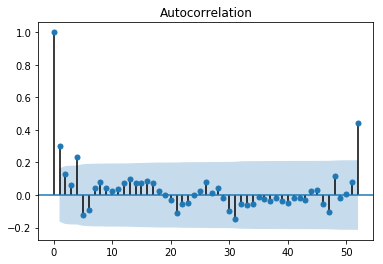

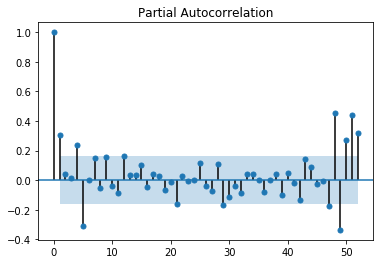

In [19]:

fplot_acf(df, lags=52)
plot_pacf(df, lags = 52)
plt.show()

##### 4. [BONUS]: What do the acf() and pacf() plots say about the type of model you want to build?

#### 5. Split the weekly sales data in a training and test set - using the first 75% of the data for training.

In [20]:
df.shape

(143, 1)

In [21]:
train = df.head(107)
test = df.tail(36)

#### 6. "Difference" the data by converting the sales into change in sales (diff function is convenient for doing this.)

In [22]:
train.diff(periods = 2).head(10)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,-31722.73
2010-02-26,-232229.85
2010-03-05,-57161.49
2010-03-12,29814.00
2010-03-19,-82290.89
2010-03-26,-35111.67
2010-04-02,122452.49


#### 7. Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?

In [23]:
from statsmodels.tsa.arima_model import AR

In [24]:
train.head(3)

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17


In [25]:
train_values = train['Weekly_Sales'].values
train_dates = train.index

test_values = test['Weekly_Sales'].values
test_dates = test.index

In [26]:
AR1 = AR(train_values, train_dates).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [27]:
test_dates[0]

Timestamp('2012-02-24 00:00:00')

In [28]:
test_dates[-1]

Timestamp('2012-10-26 00:00:00')

In [29]:
AR1_pred = AR1.predict(start=test_dates[0], end=test_dates[-1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [30]:
AR1_pred[:10]

array([1795228.10714292, 1766495.7297176 , 1622400.28193731,
       1613063.83727759, 1544992.60960354, 1513261.11423744,
       1486362.75532597, 1577041.86981068, 1558382.23804311,
       1569340.66506128])

#### 8. Plot the residuals - where are their significant errors?

In [31]:
test_values[:5]

array([1539387.83, 1688420.76, 1675431.16, 1677472.78, 1511068.07])

In [32]:
AR1_pred[:5]

array([1795228.10714292, 1766495.7297176 , 1622400.28193731,
       1613063.83727759, 1544992.60960354])

In [33]:
residuals = test_values - AR1_pred

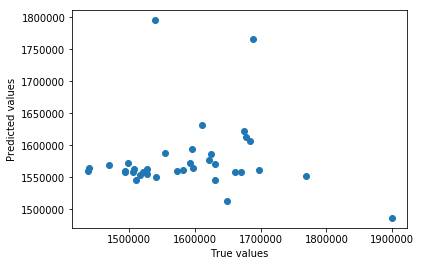

In [34]:
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.scatter(test_values, AR1_pred);

(array([ 1.,  2.,  5., 11., 10.,  5.,  0.,  1.,  0.,  1.]),
 array([-255840.27714292, -188924.83696123, -122009.39677953,
         -55093.95659784,   11821.48358386,   78736.92376555,
         145652.36394725,  212567.80412895,  279483.24431064,
         346398.68449234,  413314.12467403]),
 <a list of 10 Patch objects>)

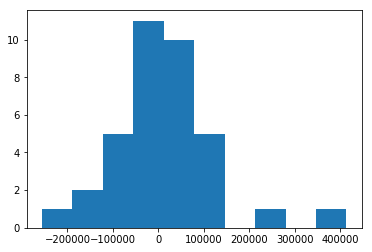

In [35]:
plt.hist(residuals)

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(test_values, AR1_pred)

79376.32778110601

#### 9. Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?

In [38]:
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings("ignore")

AR2 = ARMA(endog=train_values,
          dates= train_dates,
          order = (2, 0)).fit()

AR2_pred = AR2.predict(start=test_dates[0], end=test_dates[-1])

mean_absolute_error(test_values, AR2_pred)

AR2_2 = ARMA(endog=train_values,
            dates = train_dates, 
            order = (2,2)).fit()

AR2_2_pred = AR2_2.predict(start = test_dates[0], end = test_dates[-1])

mean_absolute_error(test_values, AR2_2_pred)

#### 10. Assemble your findings, including any useful graphs.

In [45]:
sm.__version__

'0.9.0'

In [46]:
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Thu, 11 Apr 2019   AIC                           2876.963
Time:                        20:11:23   BIC                           2887.655
Sample:                    02-05-2010   HQIC                          2881.298
                         - 02-17-2012                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.544e+06    2.4e+04     64.349      0.000     1.5e+06    1.59e+06
ar.L1.y        0.2974      0.097      3.075      0.003       0.108       0.487
ar.L2.y        0.0589      0.098      0.603      0.548      -0.132       0.250
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3080           +0.0000j            2.3080            0.0000
AR.2           -7.3587           +0.0000j            7.3587            0.5000
-----------------------------------------------------------------------------
"""